# Week 2

## Python setup

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Exercises Part 1: Basic mathematical description of networks

Exercises: Chapter 2 in Network Science.

    Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why?


#### Answer

Real networks are sparse since the number of potential links, L<sub>max</sub>, will be larger than the number of the connected links, L. A network is thus sparse, if L << L<sub>max</sub>. _Read << as much less_

An example of a real network is a social media like Facebook or Twitter, where a node is a person and the links are friend connections or follows. Each person can have many friends or follow a lot of other profiles, but in reality, this number is dwarfed by the number of every possible connection, i.e. L is much smaller than L<sub>max</sub>.

The network is sparse due to the size of the network and thereby the number of possible links being much larger than the actual number of links. This would be evident, if we had to chose between representing the network with a adjacency matrix or an edge list. The edge list would be much more memory efficient, hence the sparsety of the network. 

## Exercises Part 2: Exercises using the NetworkX library

### 2.1 Write the solution exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.

![ns_2_12_1](../images/ns_2_12_1_koningsberg_problem.png)

Which of the icons in the Image in 2.19 in the book can be drawn without raising your pencil from the paper, and without drawing any line more than once? Why? 

##### Answer:
As defined by Euler, such as path cannot exist on a graph that has more than two nodes with an odd number of links.

All of them except B can be drawn without lifting the pen. Since B has 4 nodes with each 3 links, Euler's condition is not met, and thus we are not able to draw it without lifting the pen.

### 2.2 Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. 
(You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use NetworkX, but simple pen and paper).

##### 2.2.1 Undirected graph (a)

In [82]:
# Create graph and add edges
G_a = nx.Graph()
G_a.add_edges_from([(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (6, 3), (4, 2)])
G_a.add_node(5)

In [83]:
# Give list of connected components within the graph
list(nx.connected_components(G_a))

[{1, 2, 3, 4, 6}, {5}]

In [84]:
# Print the size of the graph and number of edges
print(G_a)

Graph with 6 nodes and 7 edges


In [85]:
# Print list of edges
list(G_a.edges)

[(1, 4), (1, 3), (1, 6), (1, 2), (4, 2), (3, 2), (3, 6)]

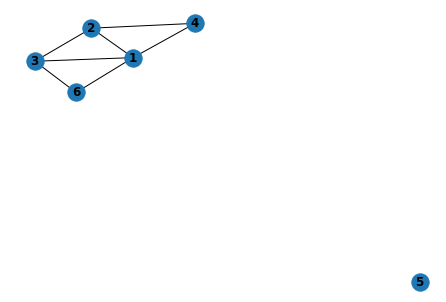

In [86]:
# Draw the graph
nx.draw(G_a, with_labels=True, font_weight='bold')

##### 2.2.2 Directed graph (b)

In [87]:
# Create graph and add edges
G_b = nx.DiGraph()
G_b.add_edges_from([
    (1,2), 
    (2,3), (2,4),
    (3,1), (3,2),
    (4,1),
    (6,1), (6,3)
])
G_b.add_node(5)

In [88]:
# Print list of edges
list(G_b.edges)

[(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]

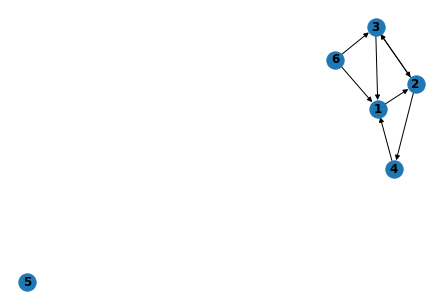

In [89]:
nx.draw(G_b, with_labels=True, font_weight='bold', arrows=True)

##### 2.2.2 The corresponding adjacency matrices.

In [90]:
# Adjacency matrix for (a)
A_a = nx.adjacency_matrix(G_a)
print(f"Adjacency list for (a):\n{A_a}")
print(f"Adjacency Matrix for (a):\n{A_a.todense()}")

Adjacency list for (a):
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 4)	1
  (2, 0)	1
  (2, 3)	1
  (2, 4)	1
  (3, 0)	1
  (3, 2)	1
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
Adjacency Matrix for (a):
[[0 1 1 1 1 0]
 [1 0 0 0 1 0]
 [1 0 0 1 1 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 0 0 0]]


C:\Users\Aleksandar Lukic\AppData\Local\Temp\ipykernel_11956\108671617.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A_a = nx.adjacency_matrix(G_a)


In [91]:
# Adjacency matrix for (b)
A_b = nx.adjacency_matrix(G_b)
print(f"Adjacency list for (b):\n{A_b}")
print(f"Adjacency Matrix for (b):\n{A_b.todense()}")

Adjacency list for (b):
  (0, 1)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (4, 0)	1
  (4, 2)	1
Adjacency Matrix for (b):
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]


C:\Users\Aleksandar Lukic\AppData\Local\Temp\ipykernel_11956\1443584658.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A_b = nx.adjacency_matrix(G_b)


#### 2.2.4 The corresponding link lists

There was a bit of confusion regarding the definition of 'Link list'. According to this [source](https://dshizuka.github.io/networkanalysis/02_dataformats.html#edge-list), an 'Edge list' is a vector with 2 columns, one for each node in a link. In networkX, we can create an edge list file, which can then be used to create graphs. However, the function does not account for nodes with no edges! Thus, node 6 is discarded which might not be 

In [104]:
# Save graph as a link list (called an edgelist)
nx.write_edgelist(G_a, "w02_2_2_4_a.edgelist")

# Create graph from edgelist file
G_a_2 = nx.read_edgelist("w02_2_2_4_a.edgelist", create_using=nx.Graph)

print(G_a_2)

Graph with 5 nodes and 7 edges


In [97]:
# Save graph as a link list (called an edgelist)
nx.write_edgelist(G_b, "w02_2_2_4_b.edgelist")

# Create graph from edgelist file
G_b_2 = nx.read_edgelist("w02_2_2_4_b.edgelist", create_using=nx.Graph)

print(G_b_2)

Graph with 5 nodes and 7 edges


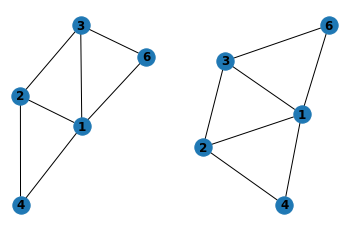

In [101]:
# Check that they look the same as the original graphs above
subax1 = plt.subplot(121)
nx.draw(G_a_2, with_labels=True, font_weight='bold', arrows=True)
subax2 = plt.subplot(122)
nx.draw(G_b_2, with_labels=True, font_weight='bold', arrows=True)

In [93]:
import networkx as nx

# Create the directed graph
G = nx.DiGraph()
G.add_edges_from([(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (2, 3), (6, 3), (4, 2)])
G.add_node(5)

# Define the linked list node class
class LinkedListNode:
    def __init__(self, value):
        self.value = value
        self.next = None

# Function to convert a graph's adjacency list to a linked list for each node
def graph_to_linked_list(graph):
    linked_list_dict = {}

    for node in graph.nodes:
        # Create the head of the linked list for this node
        if node not in linked_list_dict:
            linked_list_dict[node] = LinkedListNode(node)
        
        head = linked_list_dict[node]
        current = head
        
        # For each successor (neighbor) of the node, create a linked list node
        for neighbor in graph.successors(node):
            new_node = LinkedListNode(neighbor)
            current.next = new_node
            current = current.next

    return linked_list_dict

# Convert the directed graph to linked lists
linked_lists = graph_to_linked_list(G)

# Function to print linked list
def print_linked_list(node):
    current = node
    while current:
        print(f"{current.value} -> ", end="")
        current = current.next
    print("None")

# Print the linked list for each node
for node in linked_lists:
    print(f"Linked list for node {node}: ", end="")
    print_linked_list(linked_lists[node])


Linked list for node 1: 1 -> 4 -> 3 -> 6 -> 2 -> None
Linked list for node 4: 4 -> 2 -> None
Linked list for node 3: 3 -> 2 -> None
Linked list for node 6: 6 -> 3 -> None
Linked list for node 2: 2 -> 3 -> None
Linked list for node 5: 5 -> None


In [ ]:
print("Linked list for node 1: 1 -> 4 -> 3 -> 6 -> 2 -> None")
print("Linked list for node 4: 4 -> 2 -> None")
print("Linked list for node 3: 3 -> 2 -> None")
print("Linked list for node 6: 6 -> 3 -> None")
print("Linked list for node 2: 2 -> 3 -> None")
print("Linked list for node 5: 5 -> None")

Exercise

    Determine the average clustering coefficient of the network shown in Image 2.20a

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([(1, 4), (1, 3), (1, 6), (1, 2), (3, 2), (6, 3), (4, 2)])
G.add_node(5)

avg_clustering = nx.average_clustering(G)

print(f"Average clustering coefficient: {avg_clustering}")

Exercise 

    If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?

In [ ]:
# adjacency matrix
(1, 4), (1, 3), (1, 5), (1, 2), (3, 2), (5, 3), (4, 2)

In [ ]:
# link list
print("Linked list for node 1: 1 -> 4 -> 3 -> 5 -> 2 -> None")
print("Linked list for node 4: 4 -> 2 -> None")
print("Linked list for node 3: 3 -> 2 -> None")
print("Linked list for node 5: 5-> 3 -> None")
print("Linked list for node 2: 2 -> 3 -> None")
print("Linked list for node 6: 6 -> None")

Exercise 

    What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

Exercise 

    In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

Exercise:

    Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook. Important note: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks).

### Part 3: Plotting degree distributions

### Part 4: Random networks